# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.722757e+01     1.256164e+01
 * time: 0.0017559528350830078
     1     3.250792e+01     9.721510e+00
 * time: 0.006989002227783203
     2     2.710284e+01     5.079303e+00
 * time: 0.014306068420410156
     3     2.238425e+01     3.061192e+00
 * time: 0.01987004280090332
     4     2.237050e+01     2.911697e+00
 * time: 0.024213075637817383
     5     2.107489e+01     4.578547e+00
 * time: 0.028560876846313477
     6     2.011843e+01     2.236376e+00
 * time: 0.03380107879638672
     7     1.940883e+01     1.481694e+00
 * time: 0.038125038146972656
     8     1.869138e+01     1.259195e+00
 * time: 0.042523860931396484
     9     1.823611e+01     1.308117e+00
 * time: 0.046827077865600586
    10     1.790768e+01     1.423296e+00
 * time: 0.05115199089050293
    11     1.768875e+01     1.079136e+00
 * time: 0.05558896064758301
    12     1.755495e+01     6.739522e-01
 * time: 0.05980396270751953
    13     1.753013e+01     9.851302e-01

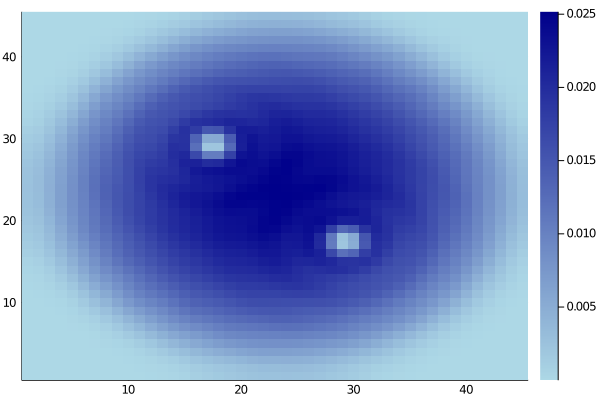

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)